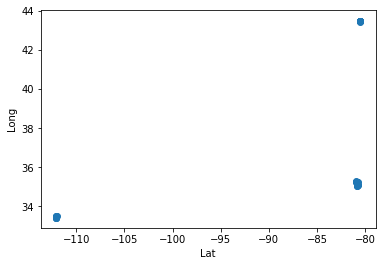

In [19]:
import matplotlib.pyplot as plt
import csv

x = []
y = []
with open("./places.txt", "r", encoding="utf8") as f:
    data = csv.reader(f, delimiter=",")
    for row in data:
        x.append(float(row[0]))
        y.append(float(row[1]))

plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Long")
plt.show()

In [20]:
#Initialise the cluster centres
clustersY = [33, 35, 43]
clustersX = [-108, -81, -81]

In [24]:
#Distance function
def get_distance(a, b):
    x1, y1 = a
    x2, y2 = b
    
    return ((x2-x1)**2) + ((y2-y1)**2)

In [25]:
def assign_clusters(pointsx, pointsy):
    assigned_clusters = []
    for i in range(len(pointsx)):
        point = (pointsx[i], pointsy[i])
        center1 = (clustersX[0], clustersY[0])
        center2 = (clustersX[1], clustersY[1])
        center3 = (clustersX[2], clustersY[2])
        d1 = get_distance(point, center1)
        d2 = get_distance(point, center2)
        d3 = get_distance(point, center3)
        
        distances = [d1, d2, d3]
        result = distances.index(min(distances))
        
        assigned_clusters.append(result)
    
    return assigned_clusters

def calculate_centres(px, py, cluster):
    sumsX = [0, 0, 0]
    sumsY = [0, 0, 0]
    counts = [0, 0, 0]
    
    for i in range(len(px)):
        sumsX[cluster[i]] = sumsX[cluster[i]] + px[i]
        sumsY[cluster[i]] = sumsY[cluster[i]] + py[i]
        counts[cluster[i]] = counts[cluster[i]] + 1
    
    for j in range(3):
        clustersX[j] = sumsX[j]/counts[j]
        clustersY[j] = sumsY[j]/counts[j]

def updated_cluster_count(prev_clusters, new_clusters):
    count = 0
    for i in range(len(prev_clusters)):
        if prev_clusters[i] != new_clusters[i]:
            count = count + 1
    
    return count

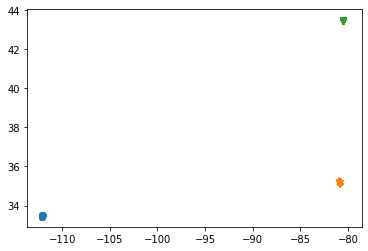

In [27]:
i = 0
new_clusters = []
while True:
    new_clusters = assign_clusters(x, y)
    calculate_centres(x, y, new_clusters)
    
    if i != 0 and updated_cluster_count(prev_clusters, new_clusters) == 0:
        break
    i = i + 1
    prev_clusters = new_clusters

c0x = []
c1x = []
c2x = []
c0y = []
c1y = []
c2y = []

for i in range(len(x)):
    if new_clusters[i] == 0:
        c0x.append(x[i])
        c0y.append(y[i])
    elif new_clusters[i] == 1:
        c1x.append(x[i])
        c1y.append(y[i])
    elif new_clusters[i] == 2:
        c2x.append(x[i])
        c2y.append(y[i])
    else:
        raise ValueError("Incorrect cluster")

plt.scatter(c0x, c0y, marker='o')
plt.scatter(c1x, c1y, marker='+')
plt.scatter(c2x, c2y, marker='v')

In [28]:
with open("./clusters.txt", "w", encoding="utf8") as o:
    for i in range(len(new_clusters)):
        o.write(f"{i} {new_clusters[i]}\n")